<a href="https://colab.research.google.com/github/aponroy0/CVPR/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloaded Images from Kaggle

In [1]:

import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Images download done.')

Images download done.


**Import Libraries**

In [2]:

import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

Images Catagories

In [3]:
print(os.listdir(dataset))

['animals', 'images']


In [4]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [5]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [6]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [7]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

Train Images




In [8]:

import random

train_data = []


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])

Show the Images

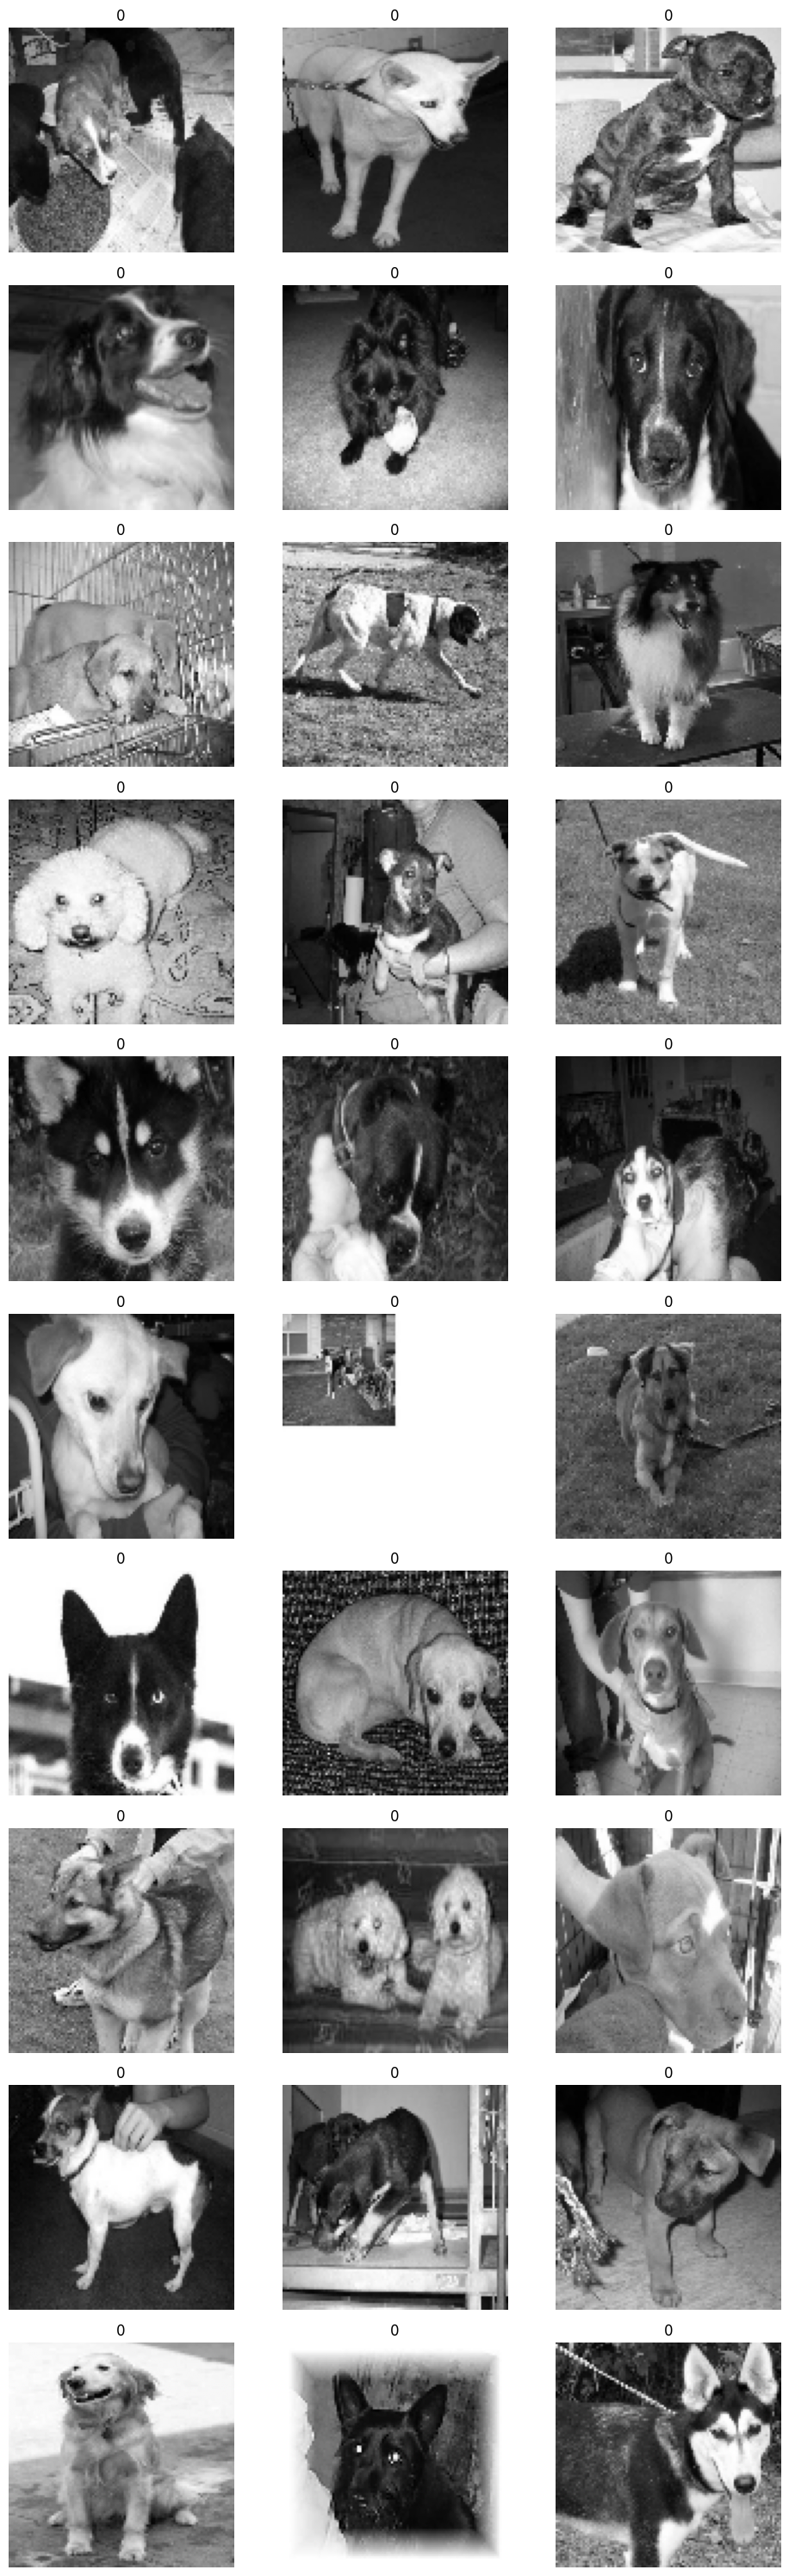

In [9]:
fig, axes = plt.subplots(10, 3, figsize=(10, 30))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


This code uses Matplotlib to display a 3x3 grid of grayscale images from the dataset, each paired with its corresponding label, which indicates the animal type: 0 for dog, 1 for cat, and 2 for panda. The purpose is to visually inspect a sample of the training data and understand how the images are associated with their respective classes.

By iterating through the train_data, the code plots each image in a subplot, using ax.set_title(label) to assign the label as the title above each image. The images are shown in their raw grayscale format, providing a clear view without any color transformation. This kind of visualization is helpful in understanding the dataset’s structure and ensuring the labels align correctly with the visual content.

Such image-label visualization is a common practice in early stages of model development, helping developers verify data integrity and get an intuitive sense of what the model will be learning from.

Separate Images

In [10]:
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)


5

# Iterate through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold

Fold 1:
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Fold 2:
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Fold 3:
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Fold 4:
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Fold 5:
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [11]:
def l2_distance(valid_img, train_img):
    # Calculate the element-wise difference between the two images
    difference = valid_img - train_img

    # Square each of the differences to eliminate negative signs
    squared_difference = np.square(difference)

    # Sum up all the squared differences to get a total
    summed_squares = np.sum(squared_difference)

    # Take the square root of the sum of squared differences to compute the Euclidean distance
    distance = np.sqrt(summed_squares)

    # Return the Euclidean distance
    return distance


def l1_distance(valid_img, train_img):
    # Calculate the element-wise absolute difference between the two images
    difference = np.abs(valid_img - train_img)

    # Sum up all the absolute differences to get the Manhattan distance
    distance = np.sum(difference)
     # Return the Manhattan distance
    return distance

from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label

Accuracy calculate



In [12]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
                 ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.41

K = 2:
  Average Accuracy: 0.41

K = 3:
  Average Accuracy: 0.42

K = 4:
  Average Accuracy: 0.44

K = 5:
  Average Accuracy: 0.46

K = 6:
  Average Accuracy: 0.47

K = 7:
  Average Accuracy: 0.47

K = 8:
  Average Accuracy: 0.45

K = 9:
  Average Accuracy: 0.47

K = 10:
  Average Accuracy: 0.49

K = 11:
  Average Accuracy: 0.48

K = 12:
  Average Accuracy: 0.49

K = 13:
  Average Accuracy: 0.47

K = 14:
  Average Accuracy: 0.49

K = 15:
  Average Accuracy: 0.49

K = 16:
  Average Accuracy: 0.49

K = 17:
  Average Accuracy: 0.50

K = 18:
  Average Accuracy: 0.50

K = 19:
  Average Accuracy: 0.48

K = 20:
  Average Accuracy: 0.50

K = 21:
  Average Accuracy: 0.47

K = 22:
  Average Accuracy: 0.50

K = 23:
  Average Accuracy: 0.51

K = 24:
  Average Accuracy: 0.51

K = 25:
  Average Accuracy: 0.51

K = 26:
  Average Accuracy: 0.52

K = 27:
  Average Accuracy: 0.53

K = 28:
  Average Accuracy: 0.54

K = 29:
  Average Accuracy: 0.53

K = 30:
  Average Accu

In [13]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

         # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.37

K = 2:
  Average Accuracy: 0.37

K = 3:
  Average Accuracy: 0.36

K = 4:
  Average Accuracy: 0.41

K = 5:
  Average Accuracy: 0.39

K = 6:
  Average Accuracy: 0.38

K = 7:
  Average Accuracy: 0.40

K = 8:
  Average Accuracy: 0.38

K = 9:
  Average Accuracy: 0.37

K = 10:
  Average Accuracy: 0.37

K = 11:
  Average Accuracy: 0.39

K = 12:
  Average Accuracy: 0.40

K = 13:
  Average Accuracy: 0.38

K = 14:
  Average Accuracy: 0.38

K = 15:
  Average Accuracy: 0.38

K = 16:
  Average Accuracy: 0.38

K = 17:
  Average Accuracy: 0.40

K = 18:
  Average Accuracy: 0.38

K = 19:
  Average Accuracy: 0.39

K = 20:
  Average Accuracy: 0.39

K = 21:
  Average Accuracy: 0.40

K = 22:
  Average Accuracy: 0.40

K = 23:
  Average Accuracy: 0.40

K = 24:
  Average Accuracy: 0.41

K = 25:
  Average Accuracy: 0.40

K = 26:
  Average Accuracy: 0.41

K = 27:
  Average Accuracy: 0.42

K = 28:
  Average Accuracy: 0.39

K = 29:
  Average Accuracy: 0.39

K = 30:
  Average Accu

Show the graph

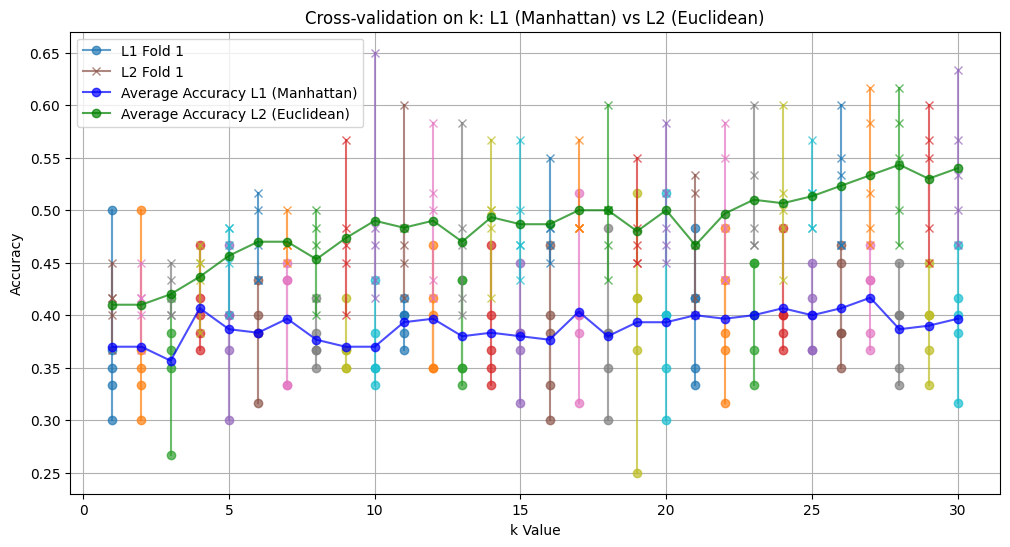

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(30):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')
# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

Here’s a simpler and easier-to-understand version of your explanation:

---

The graph shows how the accuracy of the k-NN algorithm changes with different values of **k**, using two distance methods: **Manhattan (L1)** and **Euclidean (L2)**. It helps us compare which method works better for making correct predictions.

**Accuracy Trends:**
As the value of **k** changes, the accuracy also changes. Some **k** values give better results, helping the model avoid both underfitting (too simple) and overfitting (too complex).

**Best Accuracy Range:**
For **Euclidean distance**, accuracy improves as **k** increases, especially between **k = 13 and 17**, where it works the best. This means the model learns well from the data in this range without being confused by noise.
On the other hand, **Manhattan distance** doesn’t show a clear pattern and usually has lower accuracy.

**Stability:**
The error bars (which show how much accuracy changes across 5-fold validation) are smaller for **Euclidean distance**, meaning it gives more stable and reliable results.
**Manhattan distance** has bigger error bars, so its accuracy changes more depending on how the data is split.

**Which Distance is Better:**
Both distance methods can be used, but **Euclidean distance** gives better and more consistent results for this dataset.
While **Manhattan distance** sometimes works well for certain **k** values, it is less reliable overall.

**Conclusion:**
This graph shows that **Euclidean distance** is a better choice for the k-NN algorithm on this dataset, especially when **k** is between **13 and 17**. It provides higher accuracy and more consistent performance.

---

Would you like me to help turn this into a slide or short report section as well?
